In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd

# File path to your Excel file
file_path = r"C:\Users\mohammed ansar ur ra\.ipynb files\Project_Data.xlsx"

# Attempting to read Excel without specifying engine
try:
    shift1 = pd.read_excel(file_path, sheet_name="Shift1")
    shift2 = pd.read_excel(file_path, sheet_name="Shift2")
    shift3 = pd.read_excel(file_path, sheet_name="Shift3")
    print("Data loaded successfully!")
except ImportError as e:
    print("An error occurred. Make sure the necessary libraries are installed.")
    print(e)
except FileNotFoundError:
    print(f"File not found at the path: {file_path}")


Data loaded successfully!


In [3]:
shift1['Date'] = pd.to_datetime(shift1['Date'])
shift2['Date'] = pd.to_datetime(shift2['Date'])
shift3['Date'] = pd.to_datetime(shift3['Date'])

shift1['Month'] = shift1['Date'].dt.month_name(locale = 'English')
FY_month = {'April':'A','May':'B','June':'C','July':'D','August':'E','September':'F',
            'October':'G','November':'H','December':'I','January':'J','February':'K','March':'L'}
shift1['Month_num'] = shift1['Month'].replace(FY_month)
cols = ['Month_num','Month']
shift1['Month_new'] = shift1[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

shift2['Month'] = shift2['Date'].dt.month_name(locale = 'English')
FY_month = {'April':'A','May':'B','June':'C','July':'D','August':'E','September':'F',
            'October':'G','November':'H','December':'I','January':'J','February':'K','March':'L'}
shift2['Month_num'] = shift2['Month'].replace(FY_month)
cols = ['Month_num','Month']
shift2['Month_new'] = shift2[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

shift3['Month'] = shift3['Date'].dt.month_name(locale = 'English')
FY_month = {'April':'A','May':'B','June':'C','July':'D','August':'E','September':'F',
            'October':'G','November':'H','December':'I','January':'J','February':'K','March':'L'}
shift3['Month_num'] = shift3['Month'].replace(FY_month)
cols = ['Month_num','Month']
shift3['Month_new'] = shift3[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

In [4]:
shift1['Financial_Year'] = np.where((shift1['Date'] >= '2013-04-01') & (shift1['Date'] <= '2014-03-31'),'2013_2014',
         np.where((shift1['Date'] >= '2014-04-01') & (shift1['Date'] <= '2015-03-31'),'2014_2015',
         np.where((shift1['Date'] >= '2014-04-01') & (shift1['Date'] <= '2015-03-31'),'2014_2015',
        np.where((shift1['Date'] >= '2015-04-01') & (shift1['Date'] <= '2016-03-31'),'2015_2016','Blank'))))

shift2['Financial_Year'] = np.where((shift2['Date'] >= '2013-04-01') & (shift2['Date'] <= '2014-03-31'),'2013_2014',
         np.where((shift2['Date'] >= '2014-04-01') & (shift2['Date'] <= '2015-03-31'),'2014_2015',
         np.where((shift2['Date'] >= '2014-04-01') & (shift2['Date'] <= '2015-03-31'),'2014_2015',
        np.where((shift2['Date'] >= '2015-04-01') & (shift2['Date'] <= '2016-03-31'),'2015_2016','Blank'))))

shift3['Financial_Year'] = np.where((shift3['Date'] >= '2013-04-01') & (shift3['Date'] <= '2014-03-31'),'2013_2014',
         np.where((shift3['Date'] >= '2014-04-01') & (shift3['Date'] <= '2015-03-31'),'2014_2015',
         np.where((shift3['Date'] >= '2014-04-01') & (shift3['Date'] <= '2015-03-31'),'2014_2015',
        np.where((shift3['Date'] >= '2015-04-01') & (shift3['Date'] <= '2016-03-31'),'2015_2016','Blank'))))

In [5]:
shift1['Shift'] = 'Shift1'
shift2['Shift'] = 'Shift2'
shift3['Shift'] = 'Shift3'

data1 = pd.concat([shift1,shift2,shift3])
data1['Date'] = pd.to_datetime(data1['Date'])

In [6]:
total = pd.pivot_table(data1,index='Date',values = ['Working Hour', 'Idle Hour', 'Maintenace Hour','Break down hours', 'Total Hours', 'Production'],aggfunc='sum').reset_index()
total['Date'] = pd.to_datetime(total['Date'])

total['Financial_Year'] = np.where((total['Date'] >= '2013-04-01') & (total['Date'] <= '2014-03-31'),'2013_2014',
         np.where((total['Date'] >= '2014-04-01') & (total['Date'] <= '2015-03-31'),'2014_2015',
         np.where((total['Date'] >= '2014-04-01') & (total['Date'] <= '2015-03-31'),'2014_2015',
        np.where((total['Date'] >= '2015-04-01') & (total['Date'] <= '2016-03-31'),'2015_2016','Blank'))))
total.index = total['Date']
total = total.drop(columns = 'Date')

In [7]:
total = total.reset_index()
total[total['Production'] == 0].reset_index(drop=True)

,Date,Break down hours,Idle Hour,Maintenace Hour,Production,Total Hours,Working Hour,Financial_Year
0,2014-03-26,19.0,3.0,2.0,0,24,0.0,2013_2014
1,2014-04-18,19.0,3.0,2.0,0,24,0.0,2014_2015
2,2015-06-01,19.0,3.0,2.0,0,24,0.0,2015_2016
3,2015-06-22,19.0,3.0,2.0,0,24,0.0,2015_2016


In [8]:
zero_production = pd.merge(total[total['Production'] == 0].reset_index(drop=True),data1[['Date','Breakdown_Reason']].drop_duplicates(),on = 'Date',how='left').drop_duplicates()
pd.pivot_table(zero_production[['Date','Breakdown_Reason','Production']],index='Date',columns = 'Breakdown_Reason',aggfunc=lambda x: len(x.unique()))

Production    
Breakdown_Reason      EBD11 RF1
Date                           
2014-03-26                1   1
2014-04-18                1   1
2015-06-01                1   1
2015-06-22                1   1

In [9]:
total[(total['Production'] == 0)]

,Date,Break down hours,Idle Hour,Maintenace Hour,Production,Total Hours,Working Hour,Financial_Year
359,2014-03-26,19.0,3.0,2.0,0,24,0.0,2013_2014
382,2014-04-18,19.0,3.0,2.0,0,24,0.0,2014_2015
791,2015-06-01,19.0,3.0,2.0,0,24,0.0,2015_2016
812,2015-06-22,19.0,3.0,2.0,0,24,0.0,2015_2016


In [10]:
total.loc[359,['Production']] = 10528.219178
total.loc[382,['Production']] = 10596.164384
total.loc[[791,812],['Production']] = 10582.513661
total.iloc[[359,382,791,812],:]

C:\Users\mohammed ansar ur ra\AppData\Local\Temp\ipykernel_20860\2230486760.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10528.219178' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  total.loc[359,['Production']] = 10528.219178


,Date,Break down hours,Idle Hour,Maintenace Hour,Production,Total Hours,Working Hour,Financial_Year
359,2014-03-26,19.0,3.0,2.0,10528.219178,24,0.0,2013_2014
382,2014-04-18,19.0,3.0,2.0,10596.164384,24,0.0,2014_2015
791,2015-06-01,19.0,3.0,2.0,10582.513661,24,0.0,2015_2016
812,2015-06-22,19.0,3.0,2.0,10582.513661,24,0.0,2015_2016


# Modelling

In [11]:
from math import sqrt
import matplotlib as mpl
import numpy as np
import pandas as pd
import pmdarima as pm
import statsmodels as sm
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa import api as smt
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA, ARMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

In [12]:
df = total.copy()
df.index = df['Date']
del df['Date']
df.head()

,Break down hours,Idle Hour,Maintenace Hour,Production,Total Hours,Working Hour,Financial_Year
Date,,,,,,,
2013-04-01,3.0,3.0,1.5,13200.0,24,16.5,2013_2014
2013-04-02,6.0,4.0,2.0,9600.0,24,12.0,2013_2014
2013-04-03,11.0,3.0,3.0,5600.0,24,7.0,2013_2014
2013-04-04,4.0,3.0,2.5,11600.0,24,14.5,2013_2014
2013-04-05,5.0,3.0,1.5,11600.0,24,14.5,2013_2014


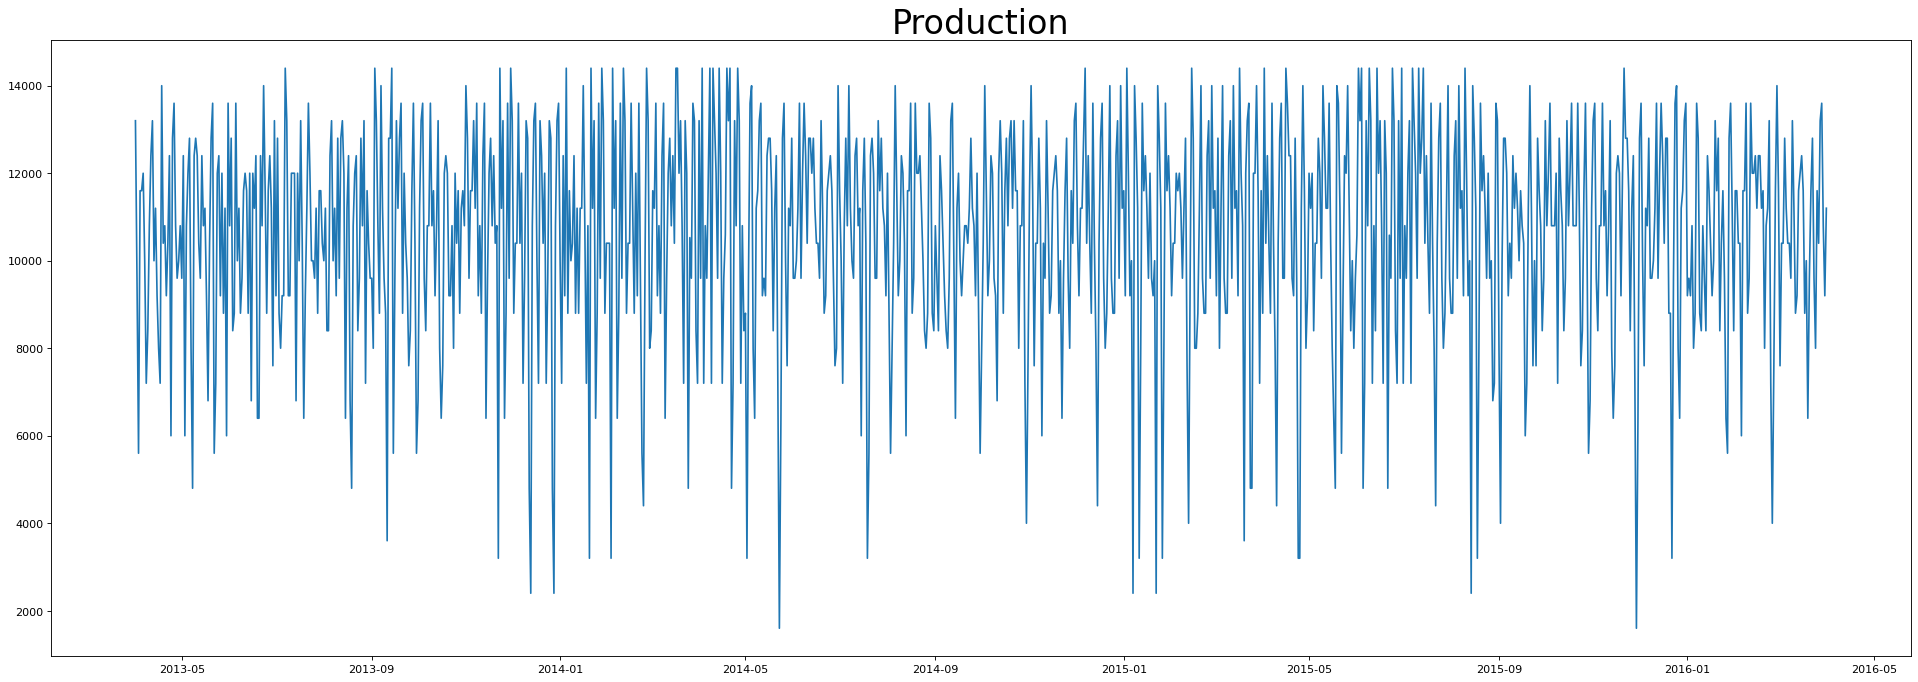

In [13]:
plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('Production', fontsize=30)
plt.plot(df.Production);

<Figure size 4000x1600 with 0 Axes>

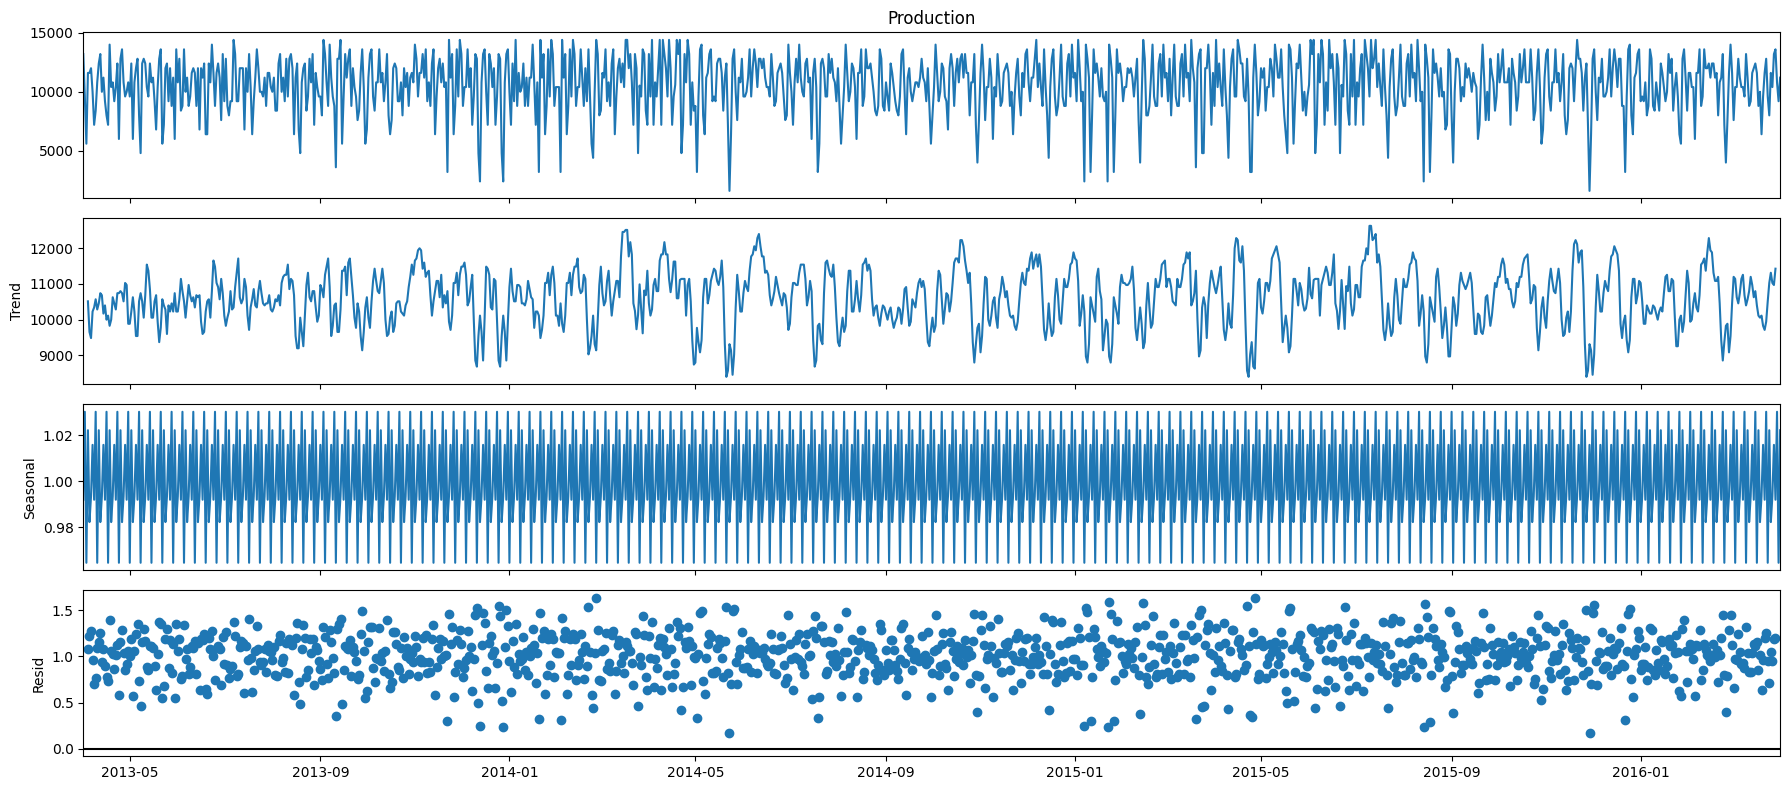

In [14]:
rcParams['figure.figsize'] = 18, 8
plt.figure(num=None, figsize=(50, 20), dpi=80, facecolor='w', edgecolor='k')
series = df.Production
result = seasonal_decompose(series, model='multiplicative')
result.plot();

### Preparing Training data and Test data

In [15]:
# We split our dataset to be able to evaluate our models
resultsDict = {}
predictionsDict = {}

df_training = df[df['Financial_Year'].isin(['2013_2014','2014_2015'])]
df_test = df[df['Financial_Year'].isin(['2015_2016'])]
print(f"{len(df_training)} days of training data \n {len(df_test)} days of testing data ")

730 days of training data 
 366 days of testing data 


In [16]:
import numpy as np
from sklearn.metrics import r2_score

EPSILON = 1e-10


def _error(actual: np.ndarray, predicted: np.ndarray):
    """Simple error"""
    return actual - predicted


def _percentage_error(actual: np.ndarray, predicted: np.ndarray):
    """
    Percentage error
    Note: result is NOT multiplied by 100
    """
    return _error(actual, predicted) / (actual + EPSILON)


def _naive_forecasting(actual: np.ndarray, seasonality: int = 1):
    """Naive forecasting method which just repeats previous samples"""
    return actual[:-seasonality]


def _relative_error(
    actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None
):
    """Relative Error"""
    if benchmark is None or isinstance(benchmark, int):
        # If no benchmark prediction provided - use naive forecasting
        if not isinstance(benchmark, int):
            seasonality = 1
        else:
            seasonality = benchmark
        return _error(actual[seasonality:], predicted[seasonality:]) / (
            _error(actual[seasonality:], _naive_forecasting(actual, seasonality))
            + EPSILON
        )

    return _error(actual, predicted) / (_error(actual, benchmark) + EPSILON)


def _bounded_relative_error(
    actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None
):
    """Bounded Relative Error"""
    if benchmark is None or isinstance(benchmark, int):
        # If no benchmark prediction provided - use naive forecasting
        if not isinstance(benchmark, int):
            seasonality = 1
        else:
            seasonality = benchmark

        abs_err = np.abs(_error(actual[seasonality:], predicted[seasonality:]))
        abs_err_bench = np.abs(
            _error(actual[seasonality:], _naive_forecasting(actual, seasonality))
        )
    else:
        abs_err = np.abs(_error(actual, predicted))
        abs_err_bench = np.abs(_error(actual, benchmark))

    return abs_err / (abs_err + abs_err_bench + EPSILON)


def _geometric_mean(a, axis=0, dtype=None):
    """Geometric mean"""
    if not isinstance(a, np.ndarray):  # if not an ndarray object attempt to convert it
        log_a = np.log(np.array(a, dtype=dtype))
    elif dtype:  # Must change the default dtype allowing array type
        if isinstance(a, np.ma.MaskedArray):
            log_a = np.log(np.ma.asarray(a, dtype=dtype))
        else:
            log_a = np.log(np.asarray(a, dtype=dtype))
    else:
        log_a = np.log(a)
    return np.exp(log_a.mean(axis=axis))


def mse(actual: np.ndarray, predicted: np.ndarray):
    """Mean Squared Error"""
    return np.mean(np.square(_error(actual, predicted)))


def rmse(actual: np.ndarray, predicted: np.ndarray):
    """Root Mean Squared Error"""
    return np.sqrt(mse(actual, predicted))


def nrmse(actual: np.ndarray, predicted: np.ndarray):
    """Normalized Root Mean Squared Error"""
    return rmse(actual, predicted) / (actual.max() - actual.min())


def me(actual: np.ndarray, predicted: np.ndarray):
    """Mean Error"""
    return np.mean(_error(actual, predicted))


def mae(actual: np.ndarray, predicted: np.ndarray):
    """Mean Absolute Error"""
    return np.mean(np.abs(_error(actual, predicted)))


mad = mae  # Mean Absolute Deviation (it is the same as MAE)


def gmae(actual: np.ndarray, predicted: np.ndarray):
    """Geometric Mean Absolute Error"""
    return _geometric_mean(np.abs(_error(actual, predicted)))


def mdae(actual: np.ndarray, predicted: np.ndarray):
    """Median Absolute Error"""
    return np.median(np.abs(_error(actual, predicted)))


def mpe(actual: np.ndarray, predicted: np.ndarray):
    """Mean Percentage Error"""
    return np.mean(_percentage_error(actual, predicted))


def mape(actual: np.ndarray, predicted: np.ndarray):
    """
    Mean Absolute Percentage Error
    Properties:
        + Easy to interpret
        + Scale independent
        - Biased, not symmetric
        - Undefined when actual[t] == 0
    Note: result is NOT multiplied by 100
    """
    return np.mean(np.abs(_percentage_error(actual, predicted)))


def mdape(actual: np.ndarray, predicted: np.ndarray):
    """
    Median Absolute Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.median(np.abs(_percentage_error(actual, predicted)))


def smape(actual: np.ndarray, predicted: np.ndarray):
    """
    Symmetric Mean Absolute Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.mean(
        2.0
        * np.abs(actual - predicted)
        / ((np.abs(actual) + np.abs(predicted)) + EPSILON)
    )


def smdape(actual: np.ndarray, predicted: np.ndarray):
    """
    Symmetric Median Absolute Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.median(
        2.0
        * np.abs(actual - predicted)
        / ((np.abs(actual) + np.abs(predicted)) + EPSILON)
    )


def maape(actual: np.ndarray, predicted: np.ndarray):
    """
    Mean Arctangent Absolute Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.mean(np.arctan(np.abs((actual - predicted) / (actual + EPSILON))))


def mase(actual: np.ndarray, predicted: np.ndarray, seasonality: int = 1):
    """
    Mean Absolute Scaled Error
    Baseline (benchmark) is computed with naive forecasting (shifted by @seasonality)
    """
    return mae(actual, predicted) / mae(
        actual[seasonality:], _naive_forecasting(actual, seasonality)
    )


def std_ae(actual: np.ndarray, predicted: np.ndarray):
    """Normalized Absolute Error"""
    __mae = mae(actual, predicted)
    return np.sqrt(
        np.sum(np.square(_error(actual, predicted) - __mae)) / (len(actual) - 1)
    )


def std_ape(actual: np.ndarray, predicted: np.ndarray):
    """Normalized Absolute Percentage Error"""
    __mape = mape(actual, predicted)
    return np.sqrt(
        np.sum(np.square(_percentage_error(actual, predicted) - __mape))
        / (len(actual) - 1)
    )


def rmspe(actual: np.ndarray, predicted: np.ndarray):
    """
    Root Mean Squared Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.sqrt(np.mean(np.square(_percentage_error(actual, predicted))))


def rmdspe(actual: np.ndarray, predicted: np.ndarray):
    """
    Root Median Squared Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.sqrt(np.median(np.square(_percentage_error(actual, predicted))))


def rmsse(actual: np.ndarray, predicted: np.ndarray, seasonality: int = 1):
    """Root Mean Squared Scaled Error"""
    q = np.abs(_error(actual, predicted)) / mae(
        actual[seasonality:], _naive_forecasting(actual, seasonality)
    )
    return np.sqrt(np.mean(np.square(q)))


def inrse(actual: np.ndarray, predicted: np.ndarray):
    """Integral Normalized Root Squared Error"""
    return np.sqrt(
        np.sum(np.square(_error(actual, predicted)))
        / np.sum(np.square(actual - np.mean(actual)))
    )


def rrse(actual: np.ndarray, predicted: np.ndarray):
    """Root Relative Squared Error"""
    return np.sqrt(
        np.sum(np.square(actual - predicted))
        / np.sum(np.square(actual - np.mean(actual)))
    )


def mre(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """Mean Relative Error"""
    return np.mean(_relative_error(actual, predicted, benchmark))


def rae(actual: np.ndarray, predicted: np.ndarray):
    """Relative Absolute Error (aka Approximation Error)"""
    return np.sum(np.abs(actual - predicted)) / (
        np.sum(np.abs(actual - np.mean(actual))) + EPSILON
    )


def mrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """Mean Relative Absolute Error"""
    return np.mean(np.abs(_relative_error(actual, predicted, benchmark)))


def mdrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """Median Relative Absolute Error"""
    return np.median(np.abs(_relative_error(actual, predicted, benchmark)))


def gmrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """Geometric Mean Relative Absolute Error"""
    return _geometric_mean(np.abs(_relative_error(actual, predicted, benchmark)))


def mbrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """Mean Bounded Relative Absolute Error"""
    return np.mean(_bounded_relative_error(actual, predicted, benchmark))


def umbrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """Unscaled Mean Bounded Relative Absolute Error"""
    __mbrae = mbrae(actual, predicted, benchmark)
    return __mbrae / (1 - __mbrae)


def mda(actual: np.ndarray, predicted: np.ndarray):
    """Mean Directional Accuracy"""
    return np.mean(
        (
            np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])
        ).astype(int)
    )


def bias(actual: np.ndarray, predicted: np.ndarray):
    """Mean forecast error(or Forecast Bias)"""
    return np.mean(actual - predicted)


METRICS = {"mse": mse,"rmse": rmse,"nrmse": nrmse,"me": me,"mae": mae,"mad": mad,
           "gmae": gmae,"mdae": mdae,"mpe": mpe,"mape": mape,"mdape": mdape,
           "smape": smape,"smdape": smdape,"maape": maape,"mase": mase,"std_ae": std_ae,
           "std_ape": std_ape,"rmspe": rmspe,"rmdspe": rmdspe,"rmsse": rmsse,"inrse": inrse,
           "rrse": rrse,"mre": mre,"rae": rae,"mrae": mrae,"mdrae": mdrae,"gmrae": gmrae,
           "mbrae": mbrae,"umbrae": umbrae,"mda": mda,"bias": bias,"r2": r2_score}


def evaluate(
    actual: np.ndarray, predicted: np.ndarray, metrics=("mae", "rmse", "mape", "r2")
):
    results = {}
    for name in metrics:
        try:
            results[name] = METRICS[name](actual, predicted)
        except Exception as err:
            results[name] = np.nan
            print("Unable to compute metric {0}: {1}".format(name, err))
    return results


def evaluate_all(actual: np.ndarray, predicted: np.ndarray):
    return evaluate(actual, predicted, metrics=set(METRICS.keys()))


In [17]:
# Also add the naive mean average value
mean = df_training.Production.mean()
mean = np.array([mean for u in range(len(df_test))])
resultsDict['Naive mean'] = evaluate(df_test.Production, mean)
predictionsDict['Naive mean'] = mean
resultsDict['Yesterdays value'] = evaluate(
    df_test.Production, df_test.Production)
predictionsDict['Yesterdays value'] = df_test.Production.values

### Simple Exponential Smoothing

In [18]:
# Walk throught the test data, training and predicting 1 day ahead for all the test data
index = len(df_training)
yhat = list()
for t in tqdm(range(len(df_test.Production))):
    temp_train = df[:len(df_training)+t]
    model = SimpleExpSmoothing(temp_train.Production)
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(temp_train), end=len(temp_train))
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)
resultsDict['SES'] = evaluate(df_test.Production, yhat.values)
predictionsDict['SES'] = yhat.values

100%|██████████| 366/366 [00:01<00:00, 185.93it/s]


In [19]:
resultsDict['SES']

{'mae': 1973.0603104103357,
 'rmse': 2498.4008070301884,
 'mape': 0.24896824763998704,
 'r2': -0.025224524291642236}

### Holt Winter’s Exponential Smoothing (Triple Exponential Smoothing)

In [20]:
# Walk throught the test data, training and predicting 1 day ahead for all the test data
index = len(df_training)
yhat = list()
for t in tqdm(range(len(df_test.Production))):
    temp_train = df[:len(df_training)+t]
    model = ExponentialSmoothing(temp_train.Production)
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(temp_train), end=len(temp_train))
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)
resultsDict['HWES'] = evaluate(df_test.Production, yhat.values)
predictionsDict['HWES'] = yhat.values

100%|██████████| 366/366 [00:01<00:00, 183.45it/s]


In [21]:
resultsDict['HWES']

{'mae': 1954.0242889841672,
 'rmse': 2474.2601791875745,
 'mape': 0.24635012064548087,
 'r2': -0.005507917461436529}

### Auto Regression (AR)

In [22]:
from statsmodels.tsa.ar_model import AutoReg

In [23]:
# Preparing training and test data and predicting 1 day ahead for all the test data
index = len(df_training)
yhat = list()
for t in tqdm(range(len(df_test.Production))):
    temp_train = df[:len(df_training)+t]
    model = AutoReg(temp_train.Production,lags = 30)
    model_fit = model.fit()
    predictions = model_fit.predict(
        start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)
resultsDict['AR'] = evaluate(df_test.Production, yhat.values)
predictionsDict['AR'] = yhat.values

100%|██████████| 366/366 [00:03<00:00, 106.78it/s]


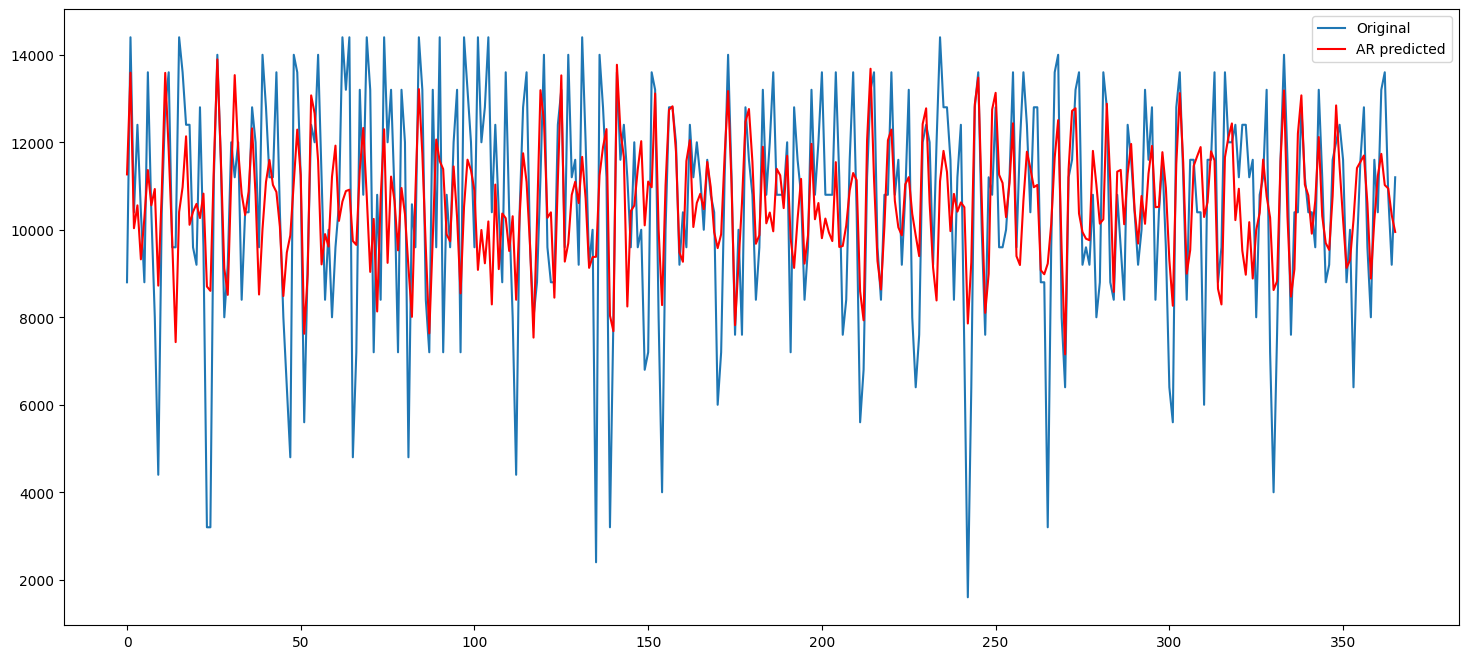

In [24]:
plt.plot(df_test.Production.values, label='Original')
plt.plot(yhat.values, color='red', label='AR predicted')
plt.legend()

In [25]:
resultsDict['AR']

{'mae': 1522.4766395019626,
 'rmse': 1995.1638378085947,
 'mape': 0.18707220731774582,
 'r2': 0.3461894974407289}

### Moving Average (MA)

In [26]:
from statsmodels.tsa.arima.model import ARIMA

In [27]:
# Preparing training and test data and predicting 1 day ahead for all the test data
index = len(df_training)
yhat = list()
for t in tqdm(range(len(df_test.Production))):
    temp_train = df[:len(df_training)+t]
    model = ARIMA(temp_train.Production, order=(0,0,1))
    model_fit = model.fit()
    predictions = model_fit.predict(
        start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)
resultsDict['MA'] = evaluate(df_test.Production, yhat.values)
predictionsDict['MA'] = yhat.values

  0%|          | 0/366 [00:00<?, ?it/s]

100%|██████████| 366/366 [00:18<00:00, 19.67it/s]


In [28]:
resultsDict['MA']

{'mae': 1907.1120522465828,
 'rmse': 2412.5099052987057,
 'mape': 0.238202138571524,
 'r2': 0.0440548511215898}

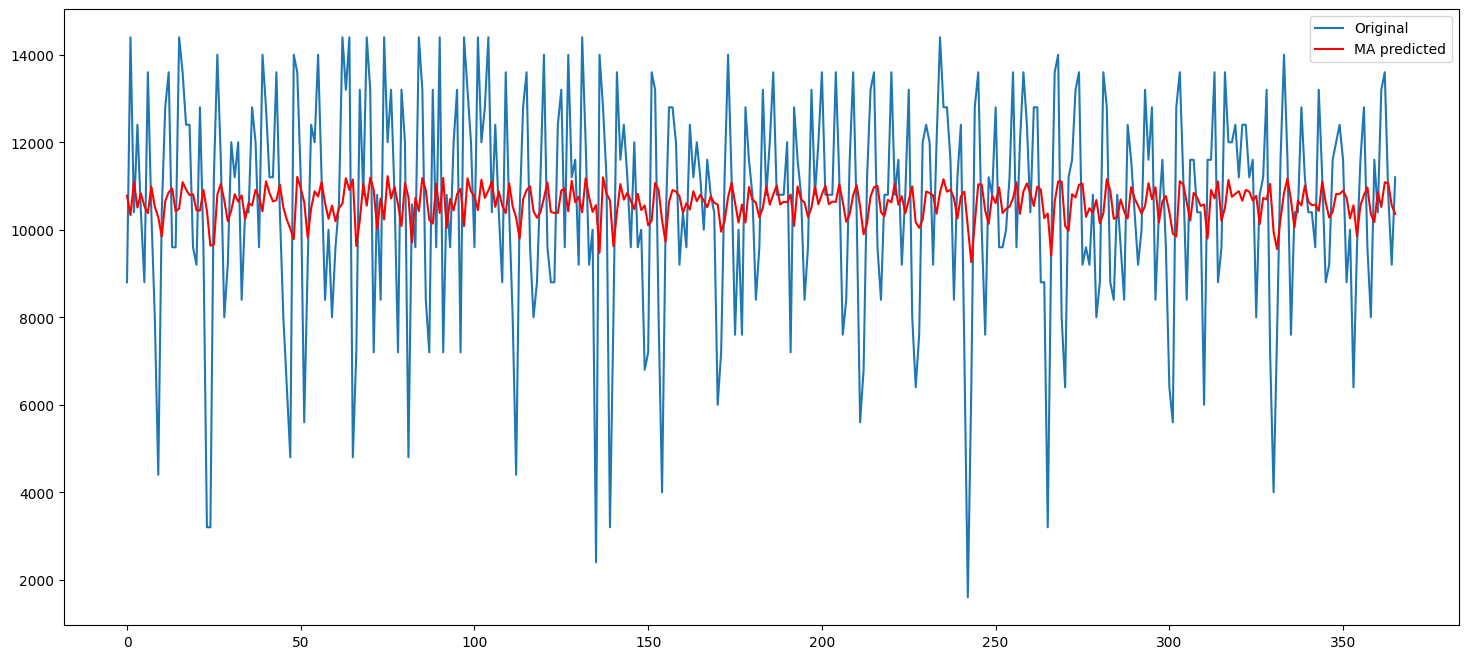

In [29]:
plt.plot(df_test.Production.values, label='Original')
plt.plot(yhat.values, color='red', label='MA predicted')
plt.legend();

### Autoregressive Moving Average (ARMA)

In [30]:
index = len(df_training)
yhat = list()
for t in tqdm(range(len(df_test.Production))):
    temp_train = df[:len(df_training)+t]
    model = ARIMA(temp_train.Production, order=(1,0,1))
    model_fit = model.fit()
    predictions = model_fit.predict(
        start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)
resultsDict['ARMA'] = evaluate(df_test.Production, yhat.values)
predictionsDict['ARMA'] = yhat.values

100%|██████████| 366/366 [00:40<00:00,  8.93it/s]


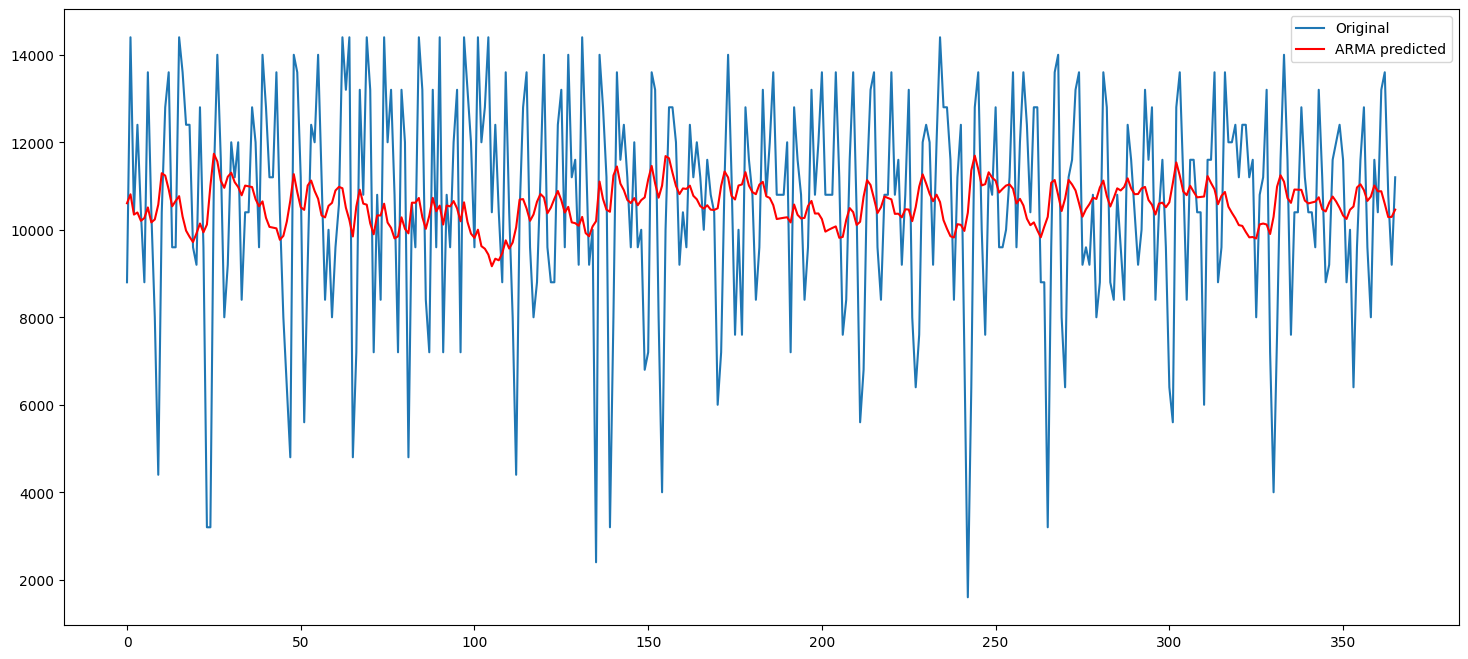

In [31]:
plt.plot(df_test.Production.values, label='Original')
plt.plot(yhat.values, color='red', label='ARMA predicted')
plt.legend();

In [32]:
resultsDict['ARMA']

{'mae': 1934.3720569253678,
 'rmse': 2438.3364308678306,
 'mape': 0.2415504712470112,
 'r2': 0.023478030796503346}

### Autoregressive integrated moving average (ARIMA)

In [33]:
index = len(df_training)
yhat = list()
for t in tqdm(range(len(df_test.Production))):
    temp_train = df[:len(df_training)+t]
    model = ARIMA(temp_train.Production, order=(1, 0, 0))
    model_fit = model.fit()
    predictions = model_fit.predict(
        start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)
resultsDict['ARIMA'] = evaluate(df_test.Production, yhat.values)
predictionsDict['ARIMA'] = yhat.values

100%|██████████| 366/366 [00:10<00:00, 33.47it/s]


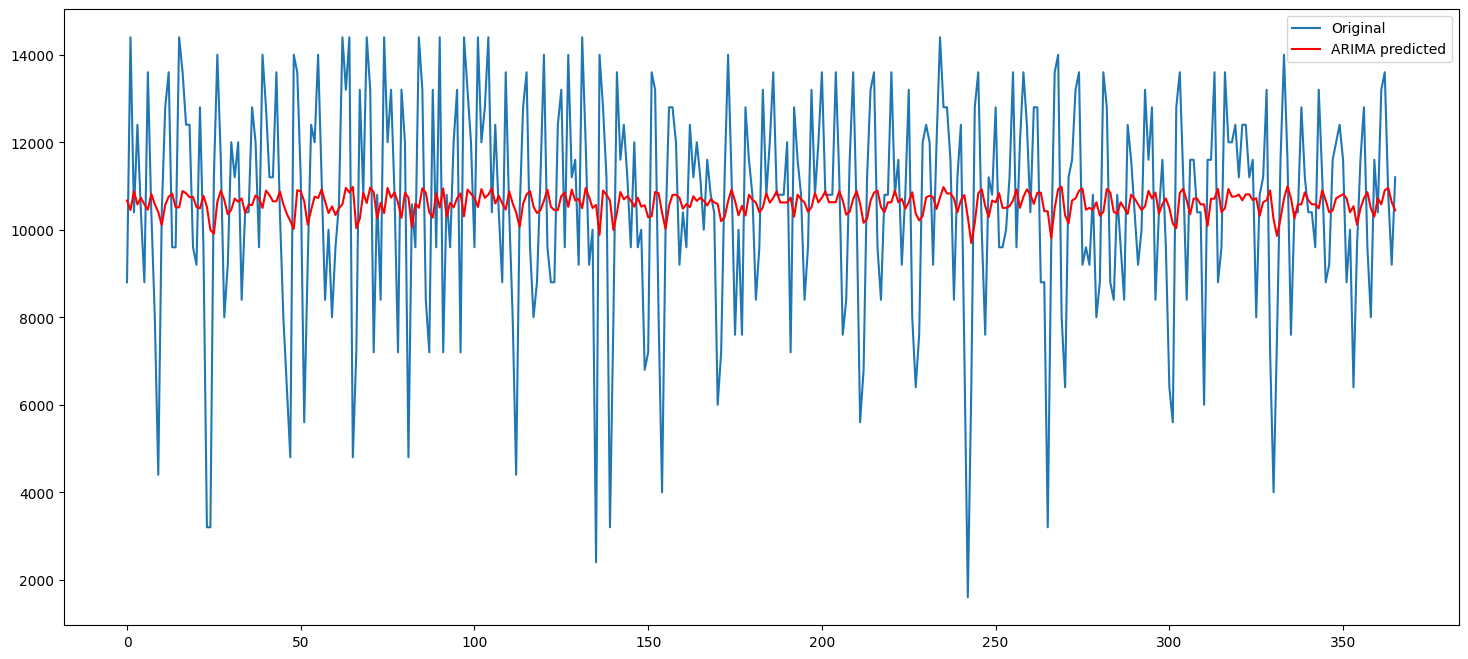

In [34]:
plt.plot(df_test.Production.values, label='Original')
plt.plot(yhat.values, color='red', label='ARIMA predicted')
plt.legend();

In [35]:
resultsDict['ARIMA']

{'mae': 1925.7414453616732,
 'rmse': 2435.8927756550306,
 'mape': 0.2411278611308347,
 'r2': 0.02543435415380979}

### Tuning ARIMA parameters

In [36]:
autoModel = pm.auto_arima(df_training.Production, trace=True,
                          error_action='ignore', suppress_warnings=True, seasonal=False)
autoModel.fit(df_training.Production)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.53 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=15643.170, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=13912.074, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=14975.425, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=13844.177, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=13791.589, Time=0.04 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.61 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.28 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.58 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=13362.795, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=13426.458, Time=0.04 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=13362.810, Time=0.18 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=13364.530, Time=0.23 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=13474.4

ARIMA(order=(3, 0, 0), scoring_args={}, suppress_warnings=True)

### Seasonal Autoregressive Integrated Moving-Average (SARIMA)

In [54]:
order = autoModel.order
yhat = list()
for t in tqdm(range(len(df_test.Production))):
    temp_train = df[:len(df_training)+t]
    model = ARIMA(temp_train.Production, order=order)
    model_fit = model.fit()
    predictions = model_fit.predict(
        start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)
resultsDict['SARIMA {0}'.format(order)] = evaluate(
    df_test.Production, yhat)
predictionsDict['SARIMA'] = yhat.values  # Use a fixed key


  0%|          | 0/366 [00:00<?, ?it/s]

100%|██████████| 366/366 [00:42<00:00,  8.57it/s]


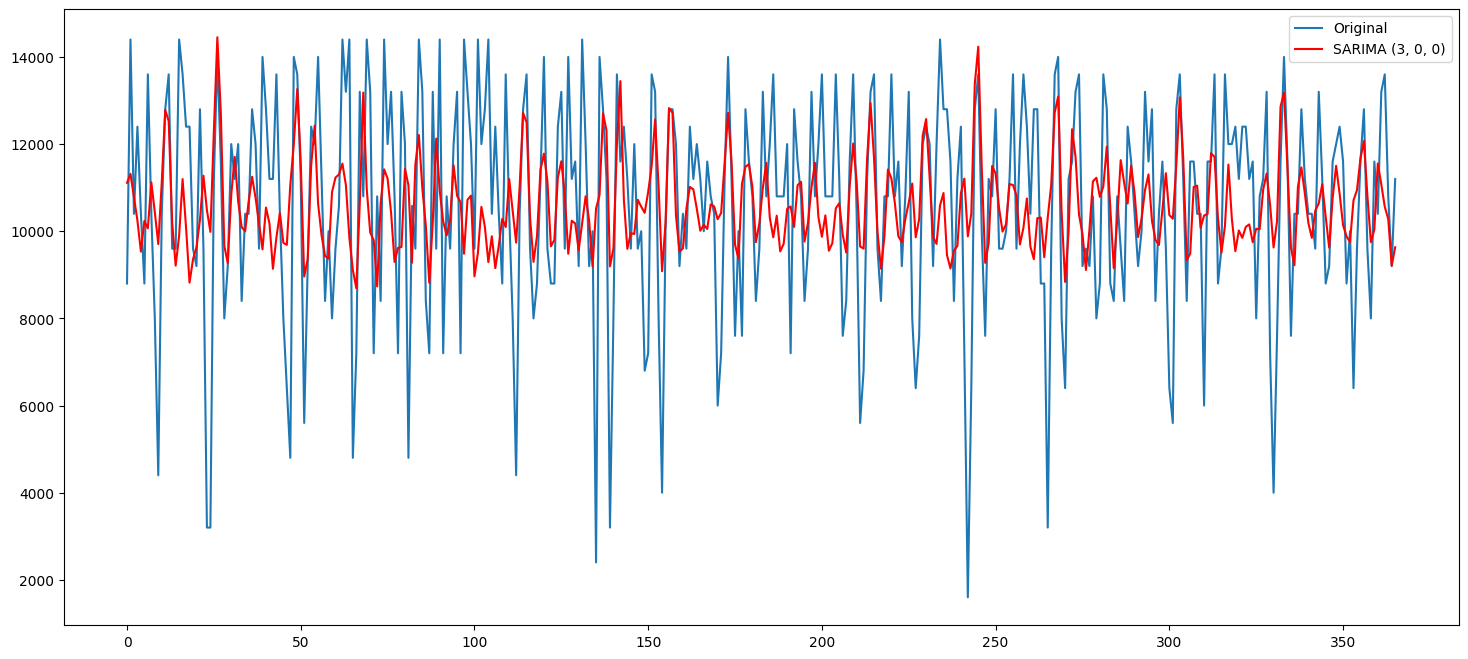

In [55]:
plt.plot(df_test.Production.values, label='Original')
plt.plot(yhat.values, color='red', label='SARIMA {0}'.format(order))
plt.legend();

In [56]:
resultsDict['SARIMA {0}'.format(order)]

{'mae': 1744.6769648564193,
 'rmse': 2268.576214636267,
 'mape': 0.21936873064120127,
 'r2': 0.1547182120424654}

In [58]:
order = autoModel.order
yhat = list()
for t in tqdm(range(len(df_test.Production))):
    temp_train = df[:len(df_training)+t]
    model = ARIMA(temp_train.Production, order=order)
    model_fit = model.fit()
    predictions = model_fit.predict(
        start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)
resultsDict['SARIMA {0}'.format(order)] = evaluate(
    df_test.Production, yhat)
predictionsDict['SARIMA'] = yhat.values  # Use a fixed key


100%|██████████| 366/366 [00:38<00:00,  9.50it/s]


### Seasonal Autoregressive Integrated Moving-Average with X component (SARIMAX)

In [59]:
index = len(df_training)
yhat = list()
for t in tqdm(range(len(df_test.Production))):
    temp_train = df[:len(df_training)+t]
    model = SARIMAX(temp_train.Production, order=(1, 0, 0), seasonal_order=(1, 0, 0, 3))
    model_fit = model.fit()
    predictions = model_fit.predict(
        start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)
resultsDict['SARIMAX'] = evaluate(df_test.Production, yhat.values)
predictionsDict['SARIMAX'] = yhat.values

100%|██████████| 366/366 [02:05<00:00,  2.91it/s]


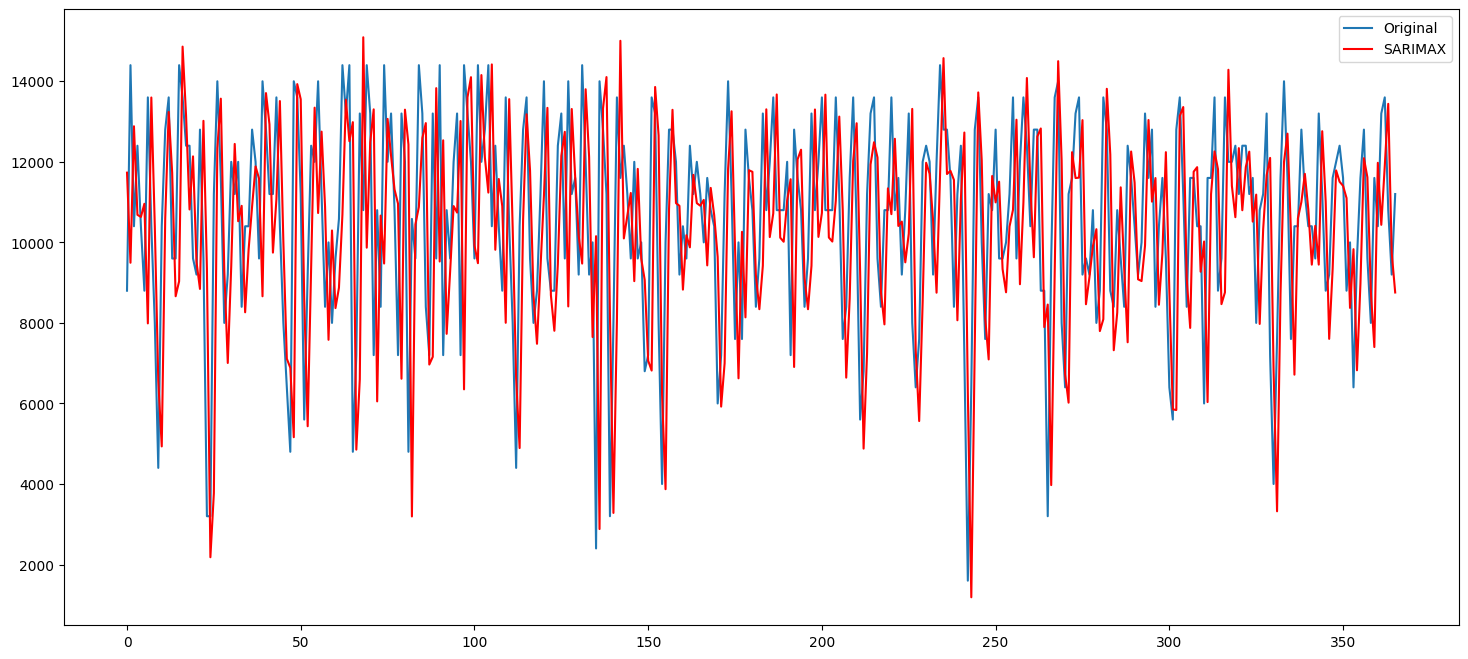

In [60]:
plt.plot(df_test.Production.values, label='Original')
plt.plot(yhat.values, color='red', label='SARIMAX')
plt.legend();

In [61]:
resultsDict['SARIMAX']

{'mae': 2402.3856836425093,
 'rmse': 3004.3532581178306,
 'mape': 0.26193262425788133,
 'r2': -0.48250701311683186}

In [62]:
if 'SARIMA' in predictionsDict and predictionsDict['SARIMA'] is not None:
    df_test['Forecast_SARIMA'] = predictionsDict['SARIMA']
else:
    print("Warning: SARIMA forecast missing. Assigning NaN values.")
    df_test['Forecast_SARIMA'] = np.nan  # Better than None


In [63]:
df_test.head()

,Break down hours,Idle Hour,Maintenace Hour,Production,Total Hours,Working Hour,Financial_Year,Forecast_SARIMA,Forecast_AR
Date,,,,,,,,,
2015-04-01,8.0,3.0,2.0,8800.0,24,11.0,2015_2016,11111.191109,11266.095793
2015-04-02,2.0,3.0,1.0,14400.0,24,18.0,2015_2016,11316.951990,13590.618472
2015-04-03,6.0,3.0,2.0,10400.0,24,13.0,2015_2016,10778.672161,10035.638959
2015-04-04,3.5,3.0,2.0,12400.0,24,15.5,2015_2016,10244.319402,10558.133489
2015-04-05,6.0,3.0,2.0,10400.0,24,13.0,2015_2016,9533.440836,9324.328276


In [64]:
df_test['Forecast_AR'] = predictionsDict['AR']

In [65]:
df_test.head()

,Break down hours,Idle Hour,Maintenace Hour,Production,Total Hours,Working Hour,Financial_Year,Forecast_SARIMA,Forecast_AR
Date,,,,,,,,,
2015-04-01,8.0,3.0,2.0,8800.0,24,11.0,2015_2016,11111.191109,11266.095793
2015-04-02,2.0,3.0,1.0,14400.0,24,18.0,2015_2016,11316.951990,13590.618472
2015-04-03,6.0,3.0,2.0,10400.0,24,13.0,2015_2016,10778.672161,10035.638959
2015-04-04,3.5,3.0,2.0,12400.0,24,15.5,2015_2016,10244.319402,10558.133489
2015-04-05,6.0,3.0,2.0,10400.0,24,13.0,2015_2016,9533.440836,9324.328276


In [67]:
pd.DataFrame(resultsDict)

,Naive mean,Yesterdays value,SES,HWES,AR,MA,ARMA,ARIMA,"SARIMA (3, 0, 0)",SARIMAX
mae,1954.118968,0.0,1973.060310,1954.024289,1522.476640,1907.112052,1934.372057,1925.741445,1744.676965,2402.385684
rmse,2467.964895,0.0,2498.400807,2474.260179,1995.163838,2412.509905,2438.336431,2435.892776,2268.576215,3004.353258
mape,0.245182,0.0,0.248968,0.246350,0.187072,0.238202,0.241550,0.241128,0.219369,0.261933
r2,-0.000398,1.0,-0.025225,-0.005508,0.346189,0.044055,0.023478,0.025434,0.154718,-0.482507
